<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LogisticRegression/26_LogisticRegressionAdvanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/8-fraud_detection.csv')

In [6]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [7]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [8]:
df['is_fraud'].unique()

array([0, 1])

In [9]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,9846
1,154


In [10]:
# imbalanced dataset

In [11]:
df.isnull().sum()

,0
transaction_amount,0
transaction_risk_score,0
is_fraud,0


In [12]:
X = df.drop("is_fraud",axis=1)
y = df['is_fraud']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

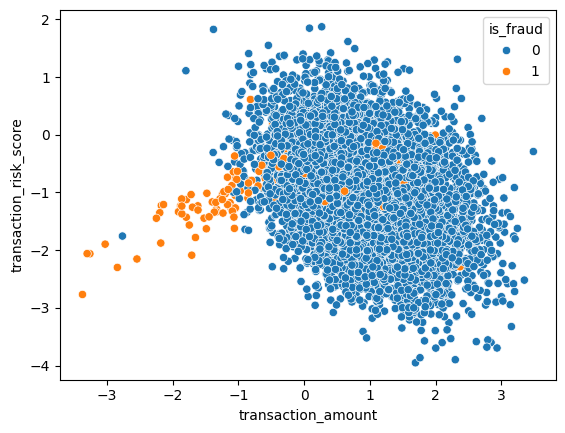

In [16]:
sns.scatterplot(x=X['transaction_amount'],y=X['transaction_risk_score'] , hue=y)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [23]:
penalty = ["l1","l2","elasticnet"]
c_values = [100,10,1.0,0.1,0.01]
solver = ["newton-cg","lbfgs","liblinear","sag","saga","newton-cholesky"]
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]] #class_weight hangi sınıfa ağırlık vereceğine karar verir

In [24]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [25]:
params = dict(penalty=penalty, C = c_values , solver= solver , class_weight = class_weight)

In [26]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [27]:
cv = StratifiedKFold()

In [28]:
grid = GridSearchCV(estimator = model,param_grid=params,scoring="accuracy",cv=cv)

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [31]:
y_pred = grid.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
print("accuracy : ", accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print("confusion matrix : \n",confusion_matrix(y_pred,y_test))

accuracy :  0.9896
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2480
           1       0.42      0.80      0.55        20

    accuracy                           0.99      2500
   macro avg       0.71      0.90      0.77      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix : 
 [[2458   22]
 [   4   16]]


In [36]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [37]:
# roc and auc

The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [38]:
# roc curve classification modelleri yaparken treshold değişimlerine göre çıkardığımız bir grafiktir.
# treshold olasılık hesaplarken yüzde 50 nin altında 0 50 yüzde  nin üstünde 1 diyoruz bu eşik değeri değişebilir
# eşik değere göre true positive ler ve true negatiflerin nasıl değiştiğini incelememiz gerekir.
# AUC => Area under the curve aslında roc curve ' in integralidir.ROC curve ' ün altında kalan alan ne kadar büyükse bizim için okadar iyi hatta 1 se perfect classifier 0.5 sa random guessing
# özellikle unbalanced veriyle çalışırsak bu metrikler önemlidir.
# ROC curve TP leri recall değerleri y eksenine FP leride X eksenine koyarız.
# istediğimiz TP lerin hemen artması

In [44]:
model_prob = grid.predict_proba(X_test)

In [45]:
model_prob

array([[0.99588689, 0.00411311],
       [0.85244227, 0.14755773],
       [0.9522898 , 0.0477102 ],
       ...,
       [0.98901102, 0.01098898],
       [0.9845954 , 0.0154046 ],
       [0.99760873, 0.00239127]])

In [46]:
model_prob = model_prob[:,1] # probabilities for the positive fraud class

In [47]:
model_prob # pozitif sınıf olanı yani 1 olan sınıfın olasıklarını alır.

array([0.00411311, 0.14755773, 0.0477102 , ..., 0.01098898, 0.0154046 ,
       0.00239127])

In [49]:
from sklearn.metrics import roc_curve,roc_auc_score  # auc score bize 0.5 1 arasındaki değerleri veriyo 1 e ne kadar yakınsa model okadar iyi çalışıyor demektir

In [50]:
model_auc = roc_auc_score(y_test,model_prob)

In [51]:
model_auc

np.float64(0.7393646586001968)

In [53]:
# model false positive rate
# model true positive rate

model_fpr,model_tpr,thresholds = roc_curve(y_test,model_prob)

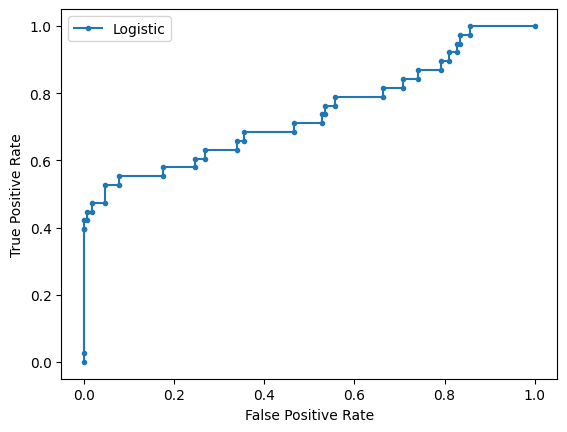

In [54]:
plt.plot(model_fpr,model_tpr,marker=".",label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

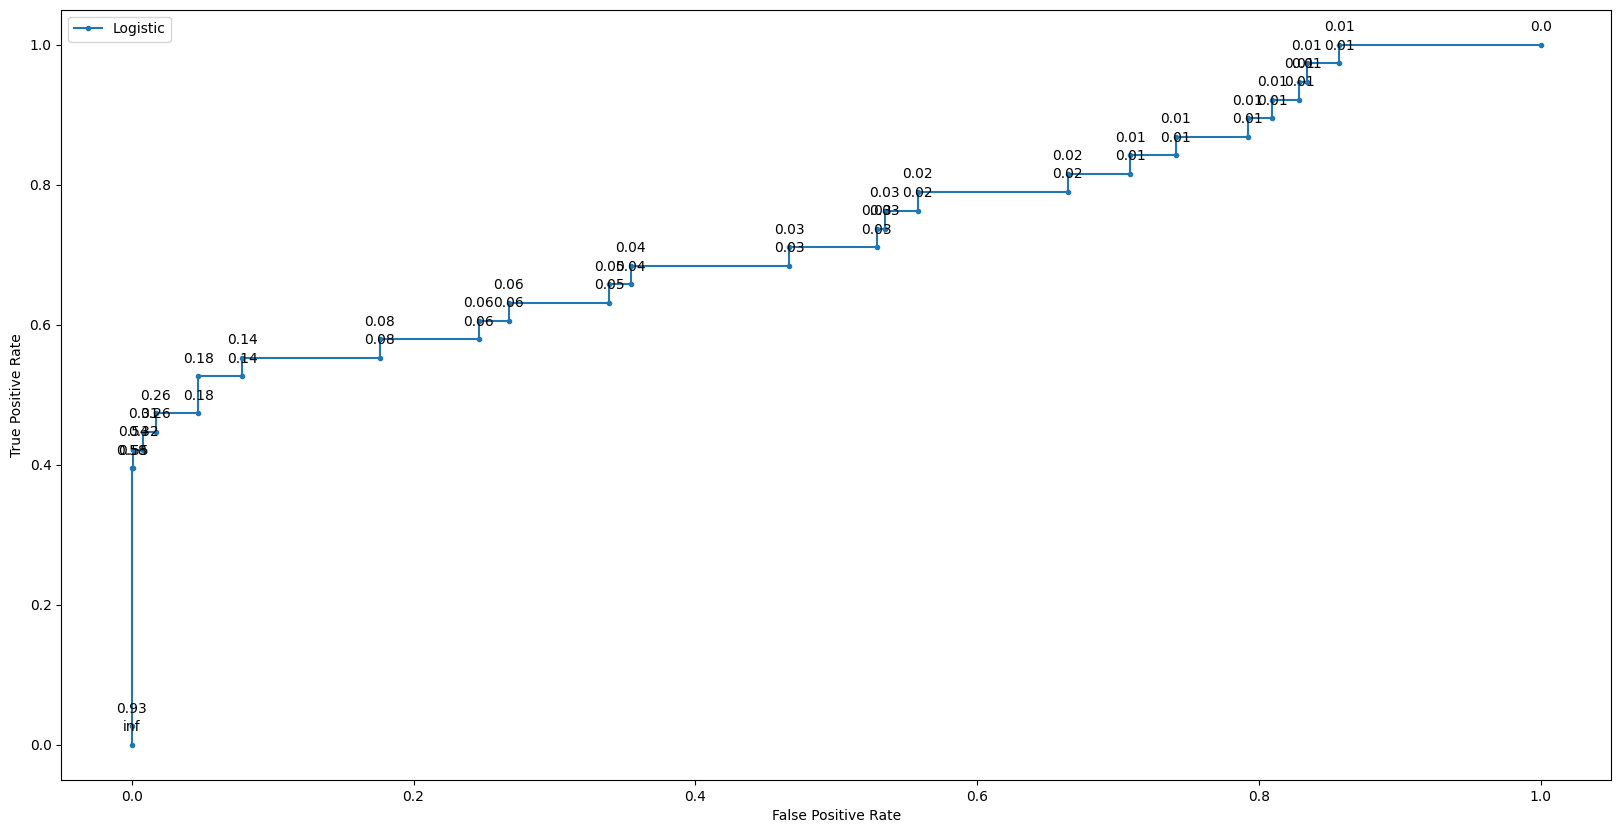

In [55]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()